In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 10.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 12.*np.pi/36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)
#n_e_nt = 2.
#p_PL = 2.2
p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

In [2]:
data_emi_Q_3_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_B_30_T_10_theta_60.txt')

data_emi_Q_3_5_B_30_T_3_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_3_theta_60.txt')
data_emi_Q_3_5_B_30_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_5_theta_60.txt')
data_emi_Q_3_5_B_30_T_8_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_8_theta_60.txt')

data_emi_Q_3_5_B_10_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_10_T_10_theta_60.txt')

data_emi_Q_3_5_B_30_T_10_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_10_theta_20.txt')
data_emi_Q_3_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_10_theta_60.txt')
data_emi_Q_3_5_B_30_T_10_theta_80 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_10_theta_80.txt')

data_emi_Q_3_5_B_30_T_10_theta_60_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_10_theta_60_n_2.txt')

data_emi_Q_3_5_B_30_T_20_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_20_theta_60.txt')
data_emi_Q_3_5_B_30_T_50_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_3_5_B_30_T_50_theta_60.txt')





data_emi_Q_4_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_4_B_30_T_10_theta_60.txt')
data_emi_Q_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_5_B_30_T_10_theta_60.txt')

data_emi_Q_6_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_6_B_30_T_10_theta_60.txt')

data_emi_Q_6_B_40_T_7_theta_40_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_6_B_40_T_7_theta_40_n_2.txt')

data_emi_Q_7_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_7_B_30_T_10_theta_60.txt')
data_emi_Q_8_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_8_B_30_T_10_theta_60.txt')




In [3]:

def kappa_low(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    norm = 4. * np.pi * special.gamma(kappa-4./3.) / (3.**(7./3.) * special.gamma(kappa-2.))
    dimensional = (n_e * e**2.)/(c * kappa**2. * w**2.)
    ans = norm * dimensional * nu_w * X**(1./3.)
    return ans

def kappa_high(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    term1 = (1./4.) * 3.**((kappa-1.)/2.) * (kappa-2.) * (kappa-1.)
    term2 = special.gamma(kappa/4. - 1./3.) * special.gamma(kappa/4. + 4./3.) 
    term3 = (n_e * e**2. * nu_c * np.sin(theta)) / c
    ans = term1*term2*term3 * X**(-(kappa-2.)/2.)
    return ans




def anu_low(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e * 3. * 3.**(1./6.) * e * (-2. + kappa) * (kappa - 1.) * kappa
    term2 = (2. * np.pi)**(1./3.) * (kappa * w)**(-2. + kappa)
    term3 = (1./np.sin(theta)) * special.gamma(5./3.)
    term4 = special.hyp2f1(-1./3. + kappa, 1. + kappa, 2./3. + kappa, -kappa * w)
    term5 = B*(-1.+3.*kappa)*((m*nu)/(B*e*np.sin(theta)))**(5./3.)
    
    f = term1*term2*term3*term4/term5
    
    
    return f
    

    
    
def anu_high(nuratio):
    
    nu = nuratio * nu_c
    
    term0 = (3.04300859/kappa)**(4.74021557) + 0.60337814
    term1 = n_e/(3. * B * (2. + kappa))
    term2 = 2.**((-1./2.) - kappa) * e * (- 2. + kappa ) * (-1. + kappa) * kappa
    term3 = np.pi**(1. - kappa) * (kappa * w)**(-2. + kappa)
    term4 = 1./np.sin(theta)
    term5 = 2.**(1. + kappa/2.) * np.pi**(kappa/2.) * special.gamma(2. + kappa/2.)
    term6 = 2**(1. + kappa/2.) * np.pi**(kappa/2.) + kappa * (2. * np.pi)**(kappa/2.)
    term7 = special.gammainc(1. + kappa/2., 2. * c * m * nu * np.pi / (B * e * np.sin(theta)))
    term8 = (B * e * np.sin(theta)/(c * m * nu))**((3. + kappa)/2.)
    
    f = term0 * term1 * term2 * term3 * term4 * (term5 - term6 * term7) * term8

    return f


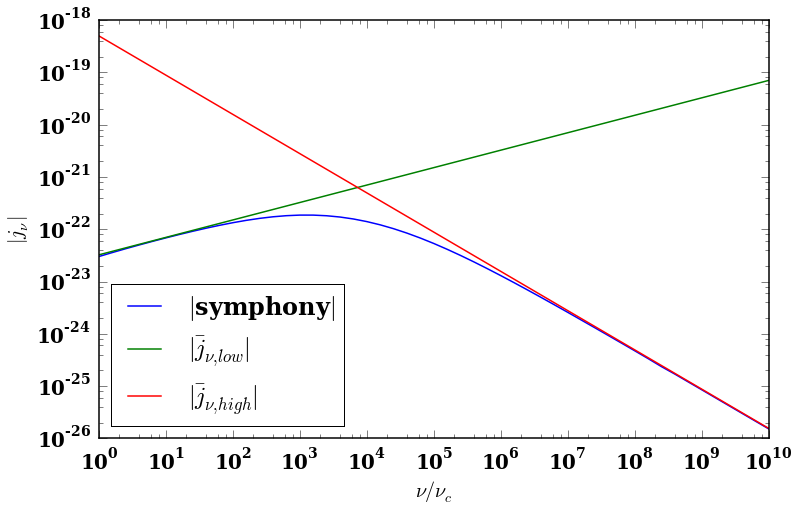

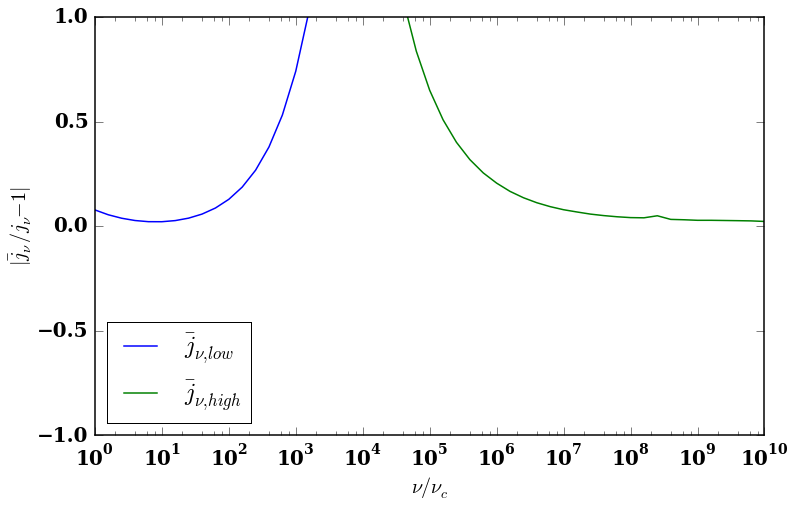

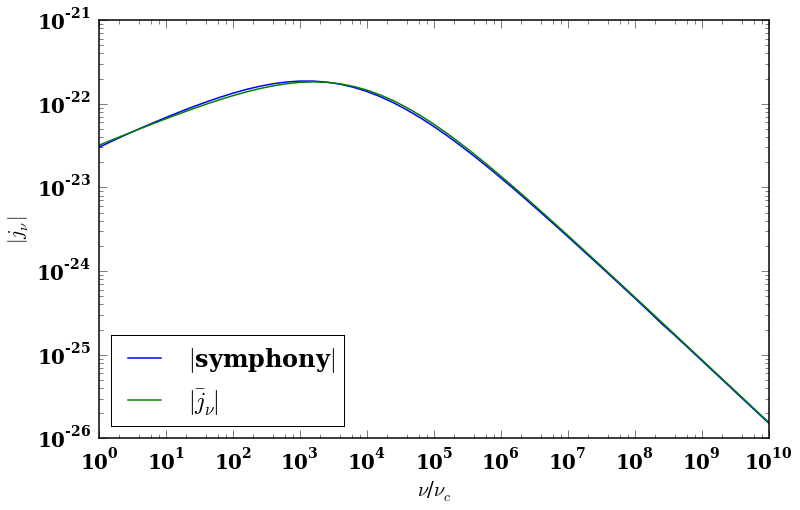

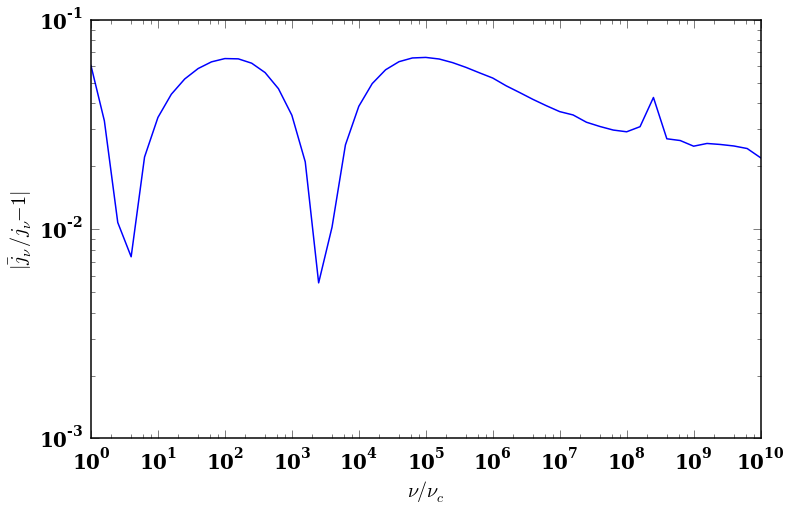

In [23]:
x_6 = data_emi_Q_3_5_B_30_T_10_theta_60[:,0]
y_6 = data_emi_Q_3_5_B_30_T_10_theta_60[:,1]



PRE = (4./5.)**2. + (1./50.)*kappa

pl.loglog(x_6, -y_6, label = '$|$symphony$|$')

pl.loglog(x_6, (1./2.)*kappa_low(x_6), label = '$|\\bar{j}_{\\nu, low}|$')
pl.loglog(x_6, PRE*kappa_high(x_6), label = '$|\\bar{j}_{\\nu, high}|$')


pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|j_\\nu|$")
pl.legend(loc = 'lower left')
pl.show()


pl.semilogx(x_6, (1./2.)*kappa_low(x_6)/(-y_6) - 1., label = '$\\bar{j}_{\\nu, low}$')
pl.semilogx(x_6, PRE*kappa_high(x_6)/(-y_6) - 1., label = '$\\bar{j}_{\\nu, high}$')
#pl.semilogx(x_6, 0*kappa_high(x_6))
#pl.semilogx(x_6, 0*kappa_high(x_6) + 0.1)
#pl.semilogx(x_6, 0*kappa_high(x_6) - 0.1)

pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|\\bar{j}_\\nu / j_{\\nu} - 1|$")



pl.ylim([-1,1])
pl.legend(loc = 'lower left')
pl.show()




def total_fitting(x):
    
    term1 = (1./2.)*kappa_low(x)
    term2 = PRE*kappa_high(x)
#    a = 3. * kappa**(-3./2.)
    a = 3.7 * kappa**(-1.6)
    f_mix3= (1./((1./term1)**(a) + (1./term2)**(a)))**(1./a)

    return f_mix3





pl.loglog(x_6, -y_6, label = '$|$symphony$|$')
pl.loglog(x_6, total_fitting(x_6), label = '$|\\bar{j}_{\\nu}|$')

pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$|j_\\nu|$")
pl.legend(loc = 'lower left')
pl.show()

pl.loglog(x_6, abs(total_fitting(x_6)/(-y_6) - 1.))
#pl.semilogx(x_6, 0*(x_6)/(-y_6))
#pl.semilogx(x_6, 0*(x_6)/(-y_6) + 0.1)
#pl.semilogx(x_6, 0*(x_6)/(-y_6) - 0.1)
#pl.semilogx(x_6, 0*(x_6)/(-y_6) + 0.2)
#pl.semilogx(x_6, 0*(x_6)/(-y_6) - 0.2)
pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel('$|\\bar{j}_\\nu / j_{\\nu} - 1|$')
pl.legend(loc = 'lower left')
pl.show()

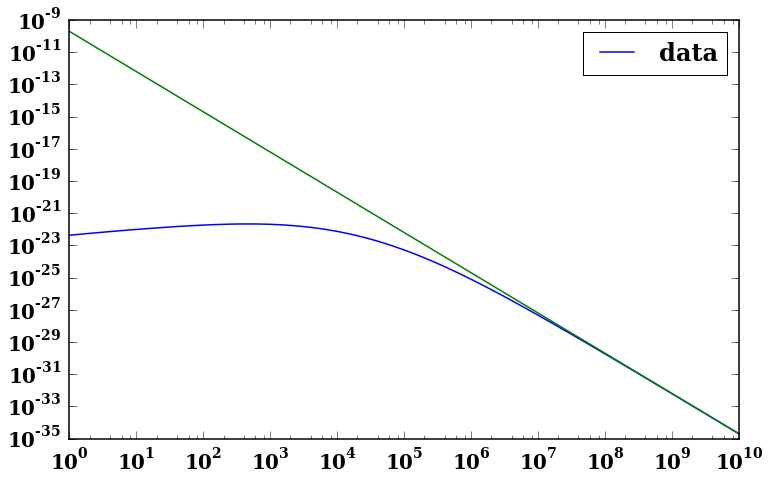

(-0.4, 0.4)

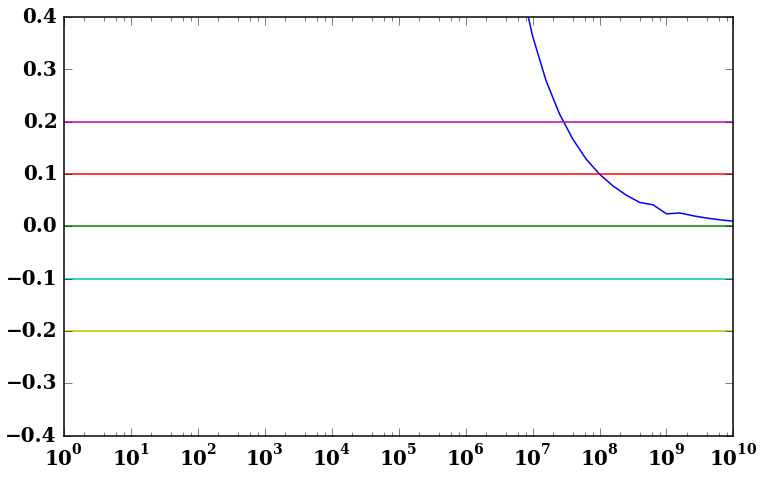

In [196]:
x_7 = data_emi_Q_7_B_30_T_10_theta_60[:,0]
y_7 = data_emi_Q_7_B_30_T_10_theta_60[:,1]


PRE = (4./5.)**2. + (1./50.)*kappa

pl.loglog(x_7, -y_7, label = 'data')

pl.loglog(x_7, PRE*kappa_high(x_7))
pl.legend()
pl.show()

pl.semilogx(x_7, PRE * kappa_high(x_7) / (-y_7) - 1.)
pl.semilogx(x_7, 0*kappa_high(x_7))
pl.semilogx(x_7, 0*kappa_high(x_7) + 0.1)
pl.semilogx(x_7, 0*kappa_high(x_7) - 0.1)
pl.semilogx(x_7, 0*kappa_high(x_7) + 0.2)
pl.semilogx(x_7, 0*kappa_high(x_7) - 0.2)
pl.ylim([-0.4,0.4])



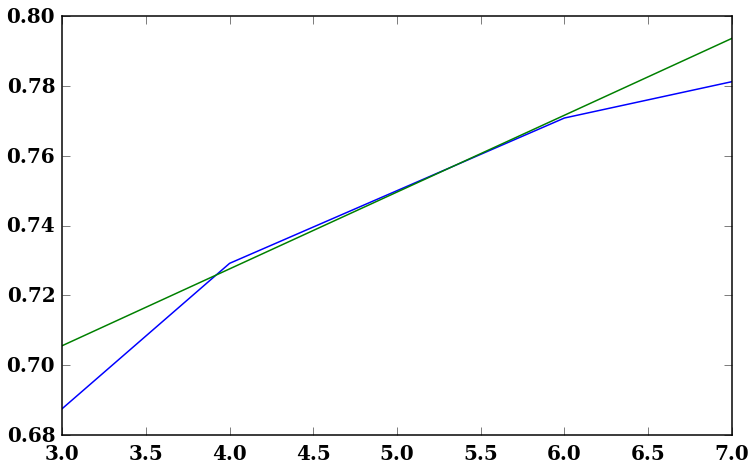

In [185]:
data_kappa_Q_emi_high_PRE_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_high_PRE_fit.txt')

x_172 = data_kappa_Q_emi_high_PRE_fit[:,0]
y_172 = (1./48.)*data_kappa_Q_emi_high_PRE_fit[:,1]


pl.plot(x_172, y_172)

def kappa_emi_Q_high_PRE_fit(x, a,b):
    f = a + b*x
    return f

curve_fit(kappa_emi_Q_high_PRE_fit, x_172, y_172)




pl.plot(x_172, kappa_emi_Q_high_PRE_fit(x_172,0.63947222,  0.02202632))






In [233]:
3.*kappa**(-3./2.)

0.5773502691896257

(array([ 3.7300251 , -1.59008306]), array([[ 0.05222527, -0.01058271],
       [-0.01058271,  0.0022087 ]]))


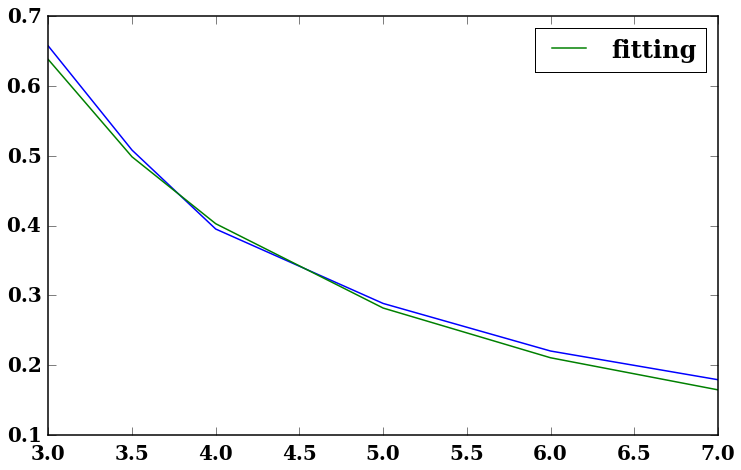

In [278]:
data_kappa_Q_emi_total_a_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/Q_mode/kappa_Q_emi_total_a_fit.txt')
x_272 = data_kappa_Q_emi_total_a_fit[:,0]
y_272 = data_kappa_Q_emi_total_a_fit[:,1]

pl.plot(x_272, y_272)

def a_fit(x,a,b):
    f = a*x**b
    return f

print curve_fit(a_fit, x_272, y_272)

pl.plot(x_272,a_fit(x_272, 3.7, -8./5.), label = 'fitting')
pl.legend()





In [333]:
print total_fitting(1.)

2.12759776649e-23
